In [98]:
# Dependencies
from citipy import citipy
import random
import pandas as pd
import json
import requests as req
import matplotlib.pyplot as plt
import seaborn as sns

In [99]:
# Save config information
api_key = "b1db5403e2815d48c0acb1416de71aae"
url = "http://api.openweathermap.org/data/2.5/weather"
units = "Imperial"

In [100]:
# List of dictionaries
#iterrow append values

city_df = []

for row in range(1,500): 
    latitude =random.uniform(-90, 90)   
    longitude =random.uniform(-180, 180)
    city = citipy.nearest_city(latitude, longitude)
    city_dict = {"Latitude": latitude, "Longitude": longitude, "City_Name": city.city_name, "Country_Code":city.country_code}
    city_df.append(city_dict)

    
city_df = pd.DataFrame(city_df)
city_df

,City_Name,Country_Code,Latitude,Longitude
0,taolanaro,mg,-49.441010,59.319771
1,castro,cl,-48.305413,-82.254785
2,ushuaia,ar,-81.892941,-44.266191
3,mataura,pf,-81.632306,-162.831900
4,castro,cl,-45.274342,-98.580096
5,veraval,in,16.297916,66.656861
6,aswan,eg,23.238005,33.930189
7,port hardy,ca,45.037873,-136.103586
8,motupe,pe,-6.147726,-79.803797
9,cape town,za,-65.262857,-13.661758


In [101]:
# Create blank columns in DataFrame
for index, row in city_df.iterrows():
    city_df['Temperature (F)'] = ""
    city_df['Humidity (%)'] = ""
    city_df['Cloudiness (%)'] = ""
    city_df['Wind Speed (mph)'] = ""
    
city_df.head()

,City_Name,Country_Code,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,taolanaro,mg,-49.441010,59.319771,,,,
1,castro,cl,-48.305413,-82.254785,,,,
2,ushuaia,ar,-81.892941,-44.266191,,,,
3,mataura,pf,-81.632306,-162.831900,,,,
4,castro,cl,-45.274342,-98.580096,,,,


In [102]:
for index, row in city_df.iterrows():
  # params = {'appid':api_key, 'q': row['City_Name'], 'units': units}
    params = {'appid':api_key, 'lat': row['Latitude'], 'lon': row['Longitude'], 'units': units}
    
    response = req.get(url, params=params)
    print(response.url)
    
    
    response_json = response.json()

    # Inside the loop add the temperature, humidity, cloudiness, and wind speed to our DataFrame
    try:
        city_df.set_value(index, "Temperature (F)", response_json["main"]["temp"])
        city_df.set_value(index, "Humidity (%)", response_json["main"]["humidity"])
        city_df.set_value(index, "Cloudiness (%)",response_json["clouds"]["all"])
        city_df.set_value(index, "Wind Speed (mph)",response_json["wind"]["speed"])
       
        
    #except AttributeError:
    except AttributeError:
        print('City not found!')
        continue
                      
city_df.head()

# Covert df to CSV
city_df.to_csv("What's The Weather Like?.csv")

http://api.openweathermap.org/data/2.5/weather?appid=b1db5403e2815d48c0acb1416de71aae&lat=-49.44101039407094&lon=59.31977090250936&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=b1db5403e2815d48c0acb1416de71aae&lat=-48.30541346328618&lon=-82.25478487597663&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=b1db5403e2815d48c0acb1416de71aae&lat=-81.89294079280212&lon=-44.26619103243118&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=b1db5403e2815d48c0acb1416de71aae&lat=-81.63230625693345&lon=-162.8318997196078&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=b1db5403e2815d48c0acb1416de71aae&lat=-45.274342392306686&lon=-98.58009647397382&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=b1db5403e2815d48c0acb1416de71aae&lat=16.297916106900928&lon=66.65686061551605&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=b1db5403e2815d48c0acb1416de71aae&lat=23.23800458636343&lon=33.9301

http://api.openweathermap.org/data/2.5/weather?appid=b1db5403e2815d48c0acb1416de71aae&lat=14.365734204280741&lon=98.21032244763472&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=b1db5403e2815d48c0acb1416de71aae&lat=81.30517896824384&lon=-8.32715795680619&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=b1db5403e2815d48c0acb1416de71aae&lat=62.660479401620194&lon=66.99291556409378&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=b1db5403e2815d48c0acb1416de71aae&lat=-34.45158125793964&lon=-101.46960902539487&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=b1db5403e2815d48c0acb1416de71aae&lat=72.86574239437837&lon=31.481750822898135&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=b1db5403e2815d48c0acb1416de71aae&lat=-55.24179086590487&lon=10.485954736061842&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=b1db5403e2815d48c0acb1416de71aae&lat=-4.769267489990682&lon=14.161030

http://api.openweathermap.org/data/2.5/weather?appid=b1db5403e2815d48c0acb1416de71aae&lat=-24.94425850175996&lon=-169.03247320472212&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=b1db5403e2815d48c0acb1416de71aae&lat=-6.888800558462961&lon=120.66625391048564&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=b1db5403e2815d48c0acb1416de71aae&lat=-84.0432618615654&lon=151.53004686590054&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=b1db5403e2815d48c0acb1416de71aae&lat=17.721881991598607&lon=176.87615999069425&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=b1db5403e2815d48c0acb1416de71aae&lat=85.52561809120414&lon=-40.116249547070026&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=b1db5403e2815d48c0acb1416de71aae&lat=-64.9992683581705&lon=174.26230484350947&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=b1db5403e2815d48c0acb1416de71aae&lat=-68.72419984725803&lon=-91.60

http://api.openweathermap.org/data/2.5/weather?appid=b1db5403e2815d48c0acb1416de71aae&lat=30.038653605658155&lon=119.94546697043148&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=b1db5403e2815d48c0acb1416de71aae&lat=-7.961023082837073&lon=90.30016604373134&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=b1db5403e2815d48c0acb1416de71aae&lat=19.50841695657779&lon=61.08807852797315&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=b1db5403e2815d48c0acb1416de71aae&lat=27.676883736921695&lon=131.38132261984146&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=b1db5403e2815d48c0acb1416de71aae&lat=-46.46909150953754&lon=-38.43315165577445&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=b1db5403e2815d48c0acb1416de71aae&lat=9.612628967483516&lon=16.984558488322335&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=b1db5403e2815d48c0acb1416de71aae&lat=-23.239485556403466&lon=-171.610

http://api.openweathermap.org/data/2.5/weather?appid=b1db5403e2815d48c0acb1416de71aae&lat=-4.923053964106899&lon=-174.3029094678832&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=b1db5403e2815d48c0acb1416de71aae&lat=3.3508782107746526&lon=-127.78826905867942&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=b1db5403e2815d48c0acb1416de71aae&lat=37.08476005637178&lon=161.38489985469266&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=b1db5403e2815d48c0acb1416de71aae&lat=-54.106891668509135&lon=98.08192471347922&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=b1db5403e2815d48c0acb1416de71aae&lat=-4.517927063347898&lon=-13.632316910805173&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=b1db5403e2815d48c0acb1416de71aae&lat=36.85733966793519&lon=97.91823799721925&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=b1db5403e2815d48c0acb1416de71aae&lat=82.39838807660476&lon=26.3852

http://api.openweathermap.org/data/2.5/weather?appid=b1db5403e2815d48c0acb1416de71aae&lat=22.276642533724356&lon=124.46127746439794&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=b1db5403e2815d48c0acb1416de71aae&lat=87.0960947814066&lon=-27.41892087834691&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=b1db5403e2815d48c0acb1416de71aae&lat=85.33242580295234&lon=35.08676506552845&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=b1db5403e2815d48c0acb1416de71aae&lat=-41.24923818385025&lon=96.70011201212128&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=b1db5403e2815d48c0acb1416de71aae&lat=-11.204666690396948&lon=173.18612379394028&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=b1db5403e2815d48c0acb1416de71aae&lat=32.76587238985233&lon=-56.41064884100845&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=b1db5403e2815d48c0acb1416de71aae&lat=17.024978261763238&lon=-14.772085

http://api.openweathermap.org/data/2.5/weather?appid=b1db5403e2815d48c0acb1416de71aae&lat=43.378345663548345&lon=-99.63131221689513&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=b1db5403e2815d48c0acb1416de71aae&lat=42.561498649921134&lon=83.99898889166127&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=b1db5403e2815d48c0acb1416de71aae&lat=-21.175263943169597&lon=102.03659336677833&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=b1db5403e2815d48c0acb1416de71aae&lat=10.602292813711955&lon=-125.03943345697684&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=b1db5403e2815d48c0acb1416de71aae&lat=38.807163090984375&lon=-21.799296584536137&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=b1db5403e2815d48c0acb1416de71aae&lat=-42.08945338018707&lon=-24.003103885292376&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=b1db5403e2815d48c0acb1416de71aae&lat=38.767136843780975&lon=-4

http://api.openweathermap.org/data/2.5/weather?appid=b1db5403e2815d48c0acb1416de71aae&lat=-73.04035384867191&lon=-167.65686122612917&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=b1db5403e2815d48c0acb1416de71aae&lat=70.46151414366429&lon=0.07779492812147737&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=b1db5403e2815d48c0acb1416de71aae&lat=60.56720420829154&lon=-3.4567686599261265&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=b1db5403e2815d48c0acb1416de71aae&lat=85.57988203686625&lon=-0.03904074281820158&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=b1db5403e2815d48c0acb1416de71aae&lat=-34.37602483876017&lon=152.00670426009833&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=b1db5403e2815d48c0acb1416de71aae&lat=51.1071103057009&lon=76.88637989277083&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=b1db5403e2815d48c0acb1416de71aae&lat=-32.59061661519718&lon=-26.66

http://api.openweathermap.org/data/2.5/weather?appid=b1db5403e2815d48c0acb1416de71aae&lat=-56.57014429734781&lon=171.70917528313714&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=b1db5403e2815d48c0acb1416de71aae&lat=24.840271803758284&lon=151.7075761986997&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=b1db5403e2815d48c0acb1416de71aae&lat=18.91135901823121&lon=59.105972154102886&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=b1db5403e2815d48c0acb1416de71aae&lat=78.56257406625267&lon=10.705264335446799&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=b1db5403e2815d48c0acb1416de71aae&lat=-29.41384160818886&lon=148.65350852760332&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=b1db5403e2815d48c0acb1416de71aae&lat=21.104304403060468&lon=56.59484491858552&units=Imperial
http://api.openweathermap.org/data/2.5/weather?appid=b1db5403e2815d48c0acb1416de71aae&lat=-5.04226569107972&lon=170.526226

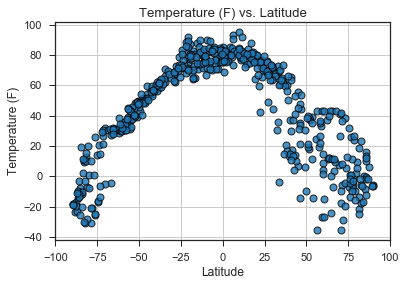

In [103]:
# Build a scatter plot for each data type
plt.scatter(city_df["Latitude"], 
            city_df["Temperature (F)"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8)

# Incorporate the other graph properties
plt.title("Temperature (F) vs. Latitude")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-100, 100])

# Save the figure
#plt.savefig("../Python-APIs/Temperature (F) vs. Latitude.png")

# Show plot
plt.show()

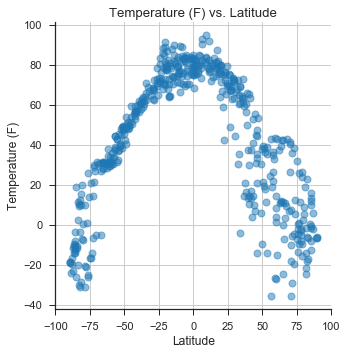

In [104]:
# Set style of scatterplot
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Build a scatter plot for each data type
sns.lmplot(data= city_df, x="Latitude", y="Temperature (F)", fit_reg=False,
           scatter_kws={"marker":"D","linewidths":1, "alpha": 0.5})


# Incorporate the other graph properties
plt.title("Temperature (F) vs. Latitude")
plt.ylabel("Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-100, 100])

# Save the figure
plt.savefig("../Python-APIs/Temperature (F) vs. Latitude.png")

# Show plot
plt.show()


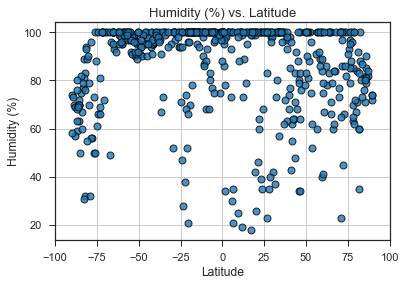

In [105]:
# Build a scatter plot for each data type
plt.scatter(city_df["Latitude"], 
            city_df["Humidity (%)"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8)

# Incorporate the other graph properties
plt.title("Humidity (%) vs. Latitude")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-100, 100])

# Save the figure
#plt.savefig("../Python-APIs/Humidity (%) vs. Latitude.png")

# Show plot
plt.show()

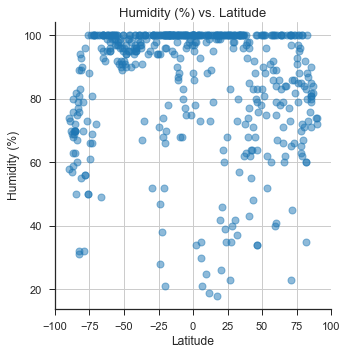

In [106]:
# Set style of scatterplot
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Build a scatter plot for each data type
sns.lmplot(data= city_df, x="Latitude", y="Humidity (%)", fit_reg=False,
           scatter_kws={"marker":"D","linewidths":1, "alpha": 0.5})

# Incorporate the other graph properties
plt.title("Humidity (%) vs. Latitude")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-100, 100])

# Save the figure
plt.savefig("../Python-APIs/Humidity (%) vs. Latitude.png")

# Show plot
plt.show()


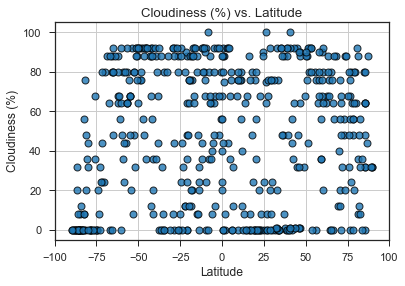

In [107]:
# Build a scatter plot for each data type
plt.scatter(city_df["Latitude"], 
            city_df["Cloudiness (%)"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8)

# Incorporate the other graph properties
plt.title("Cloudiness (%) vs. Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-100, 100])

# Save the figure
#plt.savefig("../Python-APIs/Cloudiness (%) vs. Latitude.png")

# Show plot
plt.show()

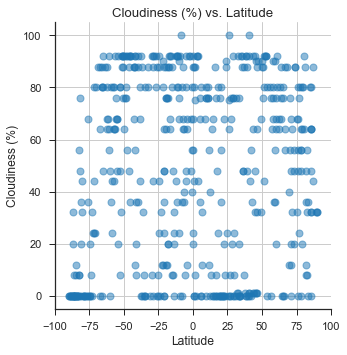

In [108]:
# Set style of scatterplot
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Build a scatter plot for each data type
sns.lmplot(data= city_df, x="Latitude", y="Cloudiness (%)", fit_reg=False,
           scatter_kws={"marker":"D","linewidths":1, "alpha": 0.5})

# Incorporate the other graph properties
plt.title("Cloudiness (%) vs. Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-100, 100])

# Save the figure
plt.savefig("../Python-APIs/Cloudiness (%) vs. Latitude.png")

# Show plot
plt.show()


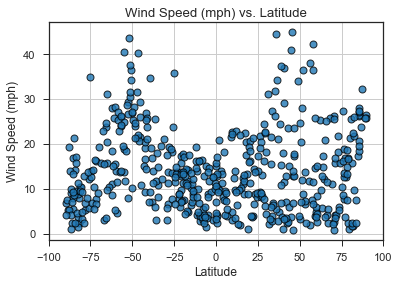

In [109]:
# Build a scatter plot for each data type
plt.scatter(city_df["Latitude"], 
            city_df["Wind Speed (mph)"],
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8)

# Incorporate the other graph properties
plt.title("Wind Speed (mph) vs. Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-100, 100])

# Save the figure
#plt.savefig("../Python-APIs/Wind Speed (mph) vs. Latitude.png")

# Show plot
plt.show()

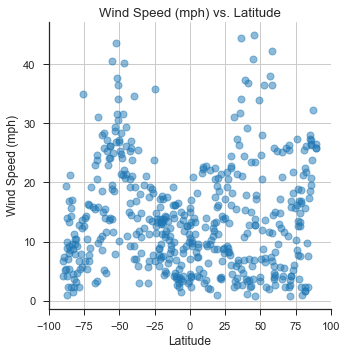

In [110]:
# Set style of scatterplot
sns.set_context("notebook", font_scale=1.1)
sns.set_style("ticks")

# Build a scatter plot for each data type
sns.lmplot(data= city_df, x="Latitude", y="Wind Speed (mph)", fit_reg=False,
           scatter_kws={"marker":"D","linewidths":1, "alpha": 0.5})


# Incorporate the other graph properties
plt.title("Wind Speed (mph) vs. Latitude")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
plt.xlim([-100, 100])

# Save the figure
plt.savefig("../Python-APIs/Wind Speed (mph) vs. Latitude.png")

# Show plot
plt.show()